<a href="https://colab.research.google.com/github/m7azhar/EDA-Airbnb/blob/main/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("Airbnb NYC 2019 - Airbnb NYC 2019.csv")
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
df =df.rename(columns={"calculated_host_listings_count":"host_count"})

In [ ]:
df['host_name'].fillna('no_name',inplace=True)
df['name'].fillna('no_name',inplace=True)
df['reviews_per_month'].fillna(0,inplace=True)
#df['reviews_per_month']=df[reviews_per_month].replace(to_replace)

In [ ]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_count,availability_365
16561,13262935,Lovely large bedroom in Brownstone (garden),9148721,Aurelie,Brooklyn,Bedford-Stuyvesant,40.68909,-73.94636,Private room,60,2,9,2018-01-17,0.24,2,0
7066,5093174,flexible 1BD LIVE/ WORK space BK,17312709,Matthew,Brooklyn,Bedford-Stuyvesant,40.69260,-73.94719,Entire home/apt,140,5,4,2015-06-06,0.08,1,0
33632,26627587,RH COZY HOME,199954647,Danny,Queens,Richmond Hill,40.69666,-73.83415,Entire home/apt,100,3,15,2019-01-01,1.33,1,0
29148,22379163,Cozy room in a big apartment around Myrtle Ave,150891854,Jiyoung,Brooklyn,Bedford-Stuyvesant,40.69178,-73.93690,Private room,23,3,2,2018-01-16,0.11,1,0
16292,13115616,"Spacious Charming NYC Apt, 10 min to Midtown",9197619,Samantha,Queens,Ditmars Steinway,40.77592,-73.91308,Entire home/apt,130,10,0,NaN,0.00,1,0


In [ ]:
df.isnull().sum()

id                     0
name                   0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
host_count             0
availability_365       0
dtype: int64

In [ ]:
df.drop(columns=['last_review'],inplace=True)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'host_count', 'availability_365'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   48895 non-null  int64  
 1   name                 48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  number_of_reviews    48895 non-null  int64  
 12  reviews_per_month    48895 non-null  float64
 13  host_count           48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.nunique()

id                     48895
name                   47893
host_id                37457
host_name              11453
neighbourhood_group        5
neighbourhood            221
latitude               19048
longitude              14718
room_type                  3
price                    674
minimum_nights           109
number_of_reviews        394
reviews_per_month        938
host_count                47
availability_365         366
dtype: int64

In [ ]:
len(df[df['price']==0])

11

In [ ]:
df.describe(include='O')

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895,48895,48895
unique,47893,11453,5,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,18,417,21661,3920,25409


In [ ]:
print(df['price'].max())

10000


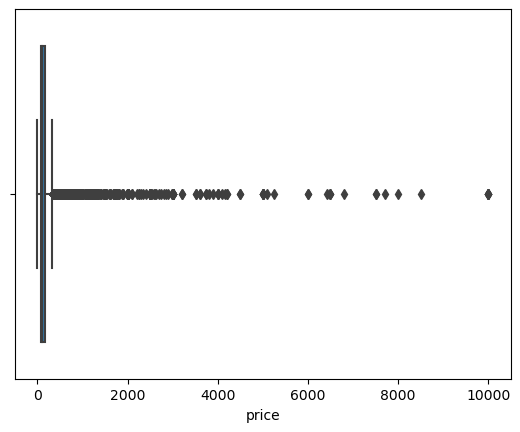

In [ ]:
#here we can find the outliers
sns.boxplot(x=df['price'])
plt.show()

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
def iqr(DFcolumns):
        Q1 = np.percentile(DFcolumns, 25)
        Q3 = np.percentile(DFcolumns, 75)

        IQR = Q3-Q1

        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)

        return lower_range, upper_range

In [ ]:
lower_range,upper_range = iqr(df['price'])
lower_range,upper_range
df = df[(df.price > lower_range) & (df.price < upper_range)]

(45918, 15)


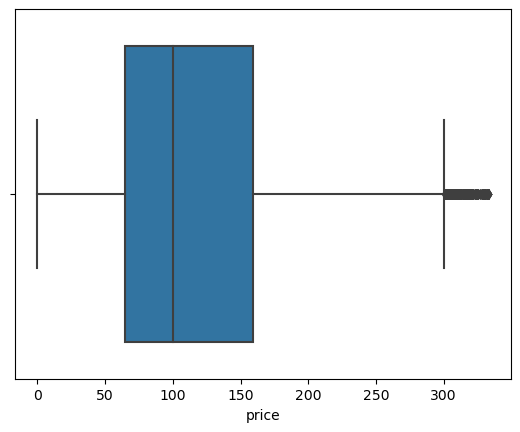

In [ ]:
sns.boxplot(x=df['price'])
print(df.shape)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

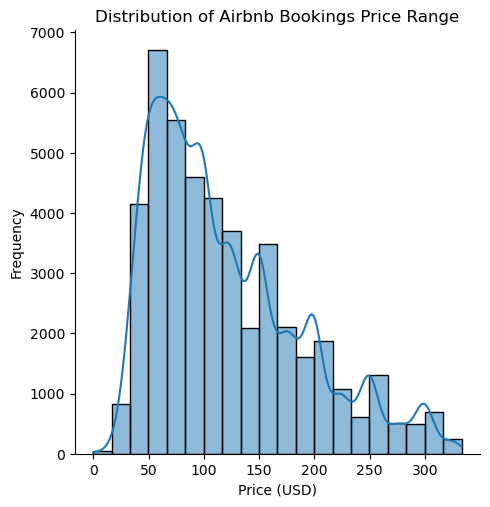

In [ ]:
#(1) Find Distribution Of Airbnb Bookings Price Range.

plt.figure(figsize=(12, 6))
sns.displot(df['price'],kde=True,bins=20)
plt.title('Distribution of Airbnb Bookings Price Range')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#(2) Find Total Listing/Property count in Each Neighborhood Group in NYC.

df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: count, dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='count'>

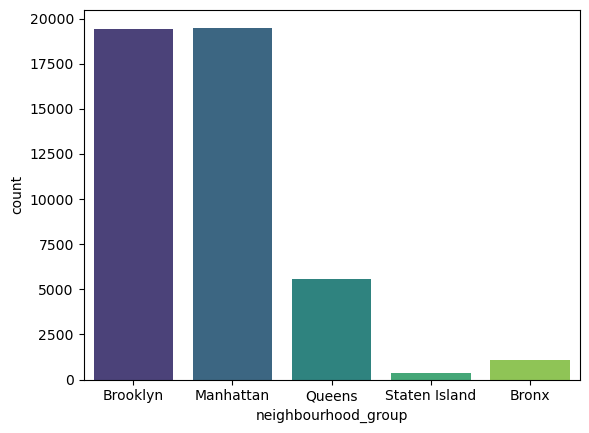

In [ ]:
sns.countplot(x=df['neighbourhood_group'],palette='viridis')

In [ ]:
#(3) Find Average Price Of listings/property in each Neighborhood Groups and also Neighborhoods. #doubt

df.groupby(["neighbourhood_group"])["price"].mean()

neighbourhood_group
Bronx             77.365421
Brooklyn         105.699614
Manhattan        145.904620
Queens            88.904437
Staten Island     89.235616
Name: price, dtype: float64

<Axes: xlabel='neighbourhood_group', ylabel='price'>

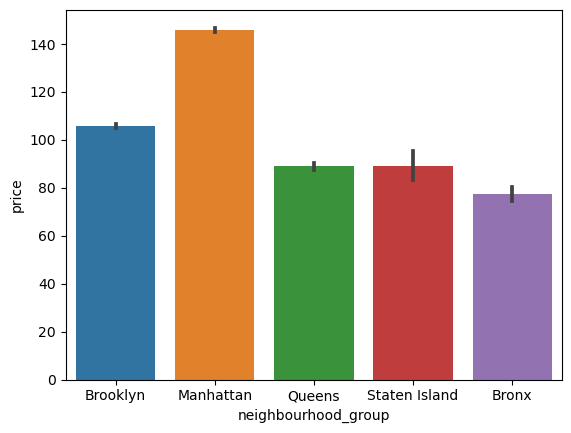

In [ ]:
sns.barplot(x = 'neighbourhood_group', y = 'price', data = df)

In [ ]:
#(4) Find Top Neighborhoods and Hosts by Listing/property in entire NYC.

top_10 = df['neighbourhood'].value_counts().head(10)
top_10

neighbourhood
Williamsburg          3732
Bedford-Stuyvesant    3638
Harlem                2585
Bushwick              2438
Upper West Side       1788
Hell's Kitchen        1731
East Village          1714
Upper East Side       1670
Crown Heights         1519
Midtown               1143
Name: count, dtype: int64

In [ ]:
top_10_hosts = df['host_name'].value_counts()[:10]
top_10_hosts

host_name
Michael         383
David           368
John            276
Sonder (NYC)    272
Alex            253
Sarah           221
Daniel          212
Maria           197
Jessica         185
Mike            184
Name: count, dtype: int64

In [ ]:
#(5) Find the Number Of Active Hosts Per Location by Each Neighborhood Groups.

df[df["availability_365"]>0].groupby("neighbourhood_group").size().reset_index()

,neighbourhood_group,0
0,Bronx,914
1,Brooklyn,12260
2,Manhattan,13559
3,Queens,4298
4,Staten Island,331


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


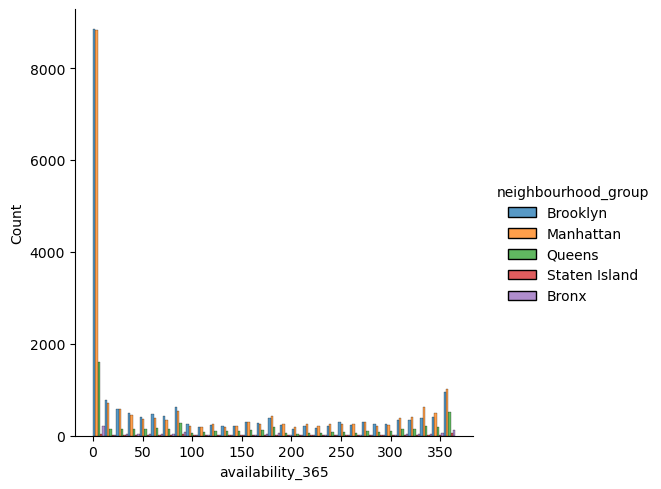

In [ ]:
sns.displot(df,x='availability_365',hue="neighbourhood_group",multiple="dodge")


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'host_count', 'availability_365'],
      dtype='object')

In [ ]:
#(6) Find Total Counts Of Each Room Types in entire NYC.
df["room_type"].value_counts()

room_type
Entire home/apt    22784
Private room       21996
Shared room         1138
Name: count, dtype: int64

<Axes: xlabel='room_type', ylabel='Count'>

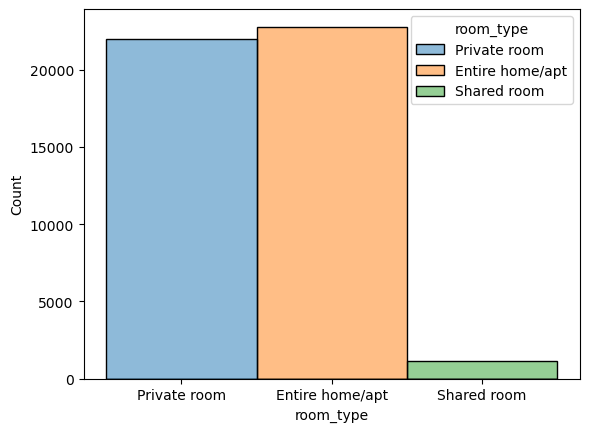

In [ ]:
sns.histplot(data=df,x="room_type",hue="room_type")

In [ ]:
#(7) Find Stay Requirement counts by Minimum Nights.  #doubt
df.groupby("room_type")["minimum_nights"].value_counts()

room_type        minimum_nights
Entire home/apt  2                 5683
                 3                 4172
                 1                 3722
                 30                2389
                 4                 1898
                                   ... 
Shared room      25                   1
                 22                   1
                 12                   1
                 11                   1
                 999                  1
Name: count, Length: 187, dtype: int64

<Axes: xlabel='room_type', ylabel='minimum_nights'>

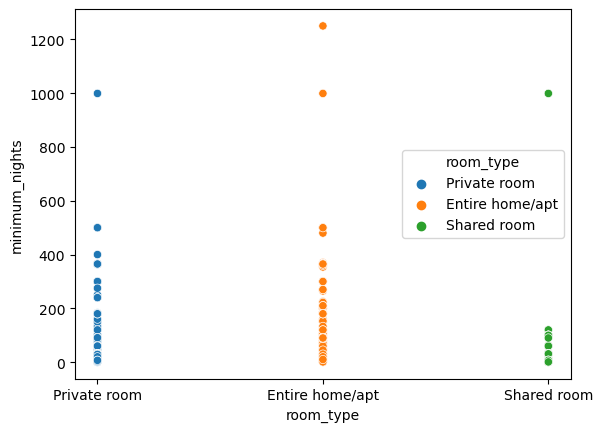

In [ ]:
sns.scatterplot(data=df,x="room_type",y="minimum_nights",hue="room_type")

In [ ]:
 #(8) Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group. ##doubt

In [ ]:
##---total----
df.groupby("neighbourhood_group")["number_of_reviews"].sum()

neighbourhood_group
Bronx             28185
Brooklyn         475936
Manhattan        428128
Queens           155719
Staten Island     11536
Name: number_of_reviews, dtype: int64

In [ ]:
##---maximum----
df.groupby("neighbourhood_group")["number_of_reviews"].max()

neighbourhood_group
Bronx            321
Brooklyn         488
Manhattan        607
Queens           629
Staten Island    333
Name: number_of_reviews, dtype: int64

In [ ]:
#(9) Find Most reviewed room type in Neighborhood groups per month.

In [ ]:
df[["neighbourhood_group","reviews_per_month","room_type"]].groupby(["neighbourhood_group","room_type"]).sum()

reviews_per_month
neighbourhood_group room_type                         
Bronx               Entire home/apt             684.91
                    Private room                860.23
                    Shared room                  58.09
Brooklyn            Entire home/apt           10268.32
                    Private room              10010.99
                    Shared room                 310.52
Manhattan           Entire home/apt            9626.07
                    Private room               9019.52
                    Shared room                 636.38
Queens              Entire home/apt            3364.74
                    Private room               5211.55
                    Shared room                 230.90
Staten Island       Entire home/apt             311.05
                    Private room                270.17
                    Shared room                   6.66

In [ ]:
#sns.barplot(data=df,x="neighbourhood_group",y="reviews_per_month",hue="room_type")

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#(10) Find Best location listing/property location for travelers. #doubt

df[df.minimum_nights<5][["neighbourhood","name"]].value_counts()[:10]

neighbourhood    name                                              
Jamaica          Hillside Hotel                                        12
Greenpoint       Loft Suite @ The Box House Hotel                      11
Williamsburg     Private room in Williamsburg                           6
Briarwood        Hillside Hotel                                         6
East Village     Cozy East Village Apartment                            6
Harlem           Harlem Gem                                             5
West Village     WEST VILLAGE Bohemian flat in neo-Tudor town house     5
Bushwick         Bushwick Oasis                                         4
East Village     East Village Apartment                                 4
Upper West Side  Upper West Side Studio                                 4
Name: count, dtype: int64

In [ ]:
# Hillside Hotel in Jamaica has 12 listings with minimum night less than 5 which is best for travellers

In [ ]:
#(11) Find also best location listing/property location for Hosts. #doubt

In [ ]:
df[df.price>df.price.mean()][["neighbourhood","name"]].value_counts()[:10]

neighbourhood    name                                              
Jamaica          Hillside Hotel                                        12
Greenpoint       Loft Suite @ The Box House Hotel                      11
Midtown          IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS     6
Upper East Side  A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE        5
West Village     West Village Apartment                                 5
Briarwood        Hillside Hotel                                         5
West Village     WEST VILLAGE Bohemian flat in neo-Tudor town house     5
Harlem           Harlem Gem                                             4
Greenpoint       Loft Suite @ Box House Hotel                           4
DUMBO            SPECTACULAR LOFT OVERLOOKING THE MANHATTAN SKYLINE     4
Name: count, dtype: int64

In [ ]:
#for a host Loft Suite at Greenpoint is best with 11 listings to earn more than average price

In [ ]:
#(12) Find Price variations in NYC Neighborhood groups.

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


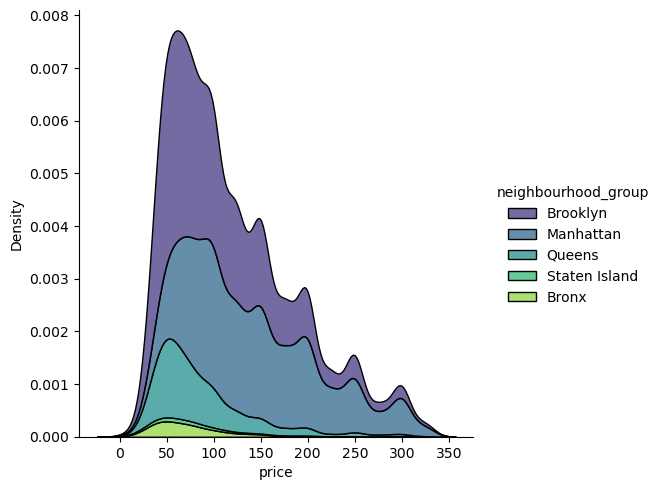

In [ ]:
sns.displot(data=df, x="price", hue='neighbourhood_group', multiple='stack',kind='kde',palette='viridis')


In [ ]:
#Mahattan is the most expensive place and the listing price at Bronx is the lowest

In [ ]:
##df['neighbourhood'].nunique()

In [ ]:
##df[df["neighbourhood_group"]=="Brooklyn"]["price"].describe()

In [ ]:
##df[["price","neighbourhood_group"]].groupby("neighbourhood_group").describe()